In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

#Reading data files into the following data frames
Training_data = pd.read_csv("../input/sales_train.csv") 
Testing_data = pd.read_csv("../input/test.csv")
#Adding supplemental data files for reference
items = pd.read_csv("../input/items.csv") 
categories = pd.read_csv("../input/item_categories.csv") 
shops = pd.read_csv("../input/shops.csv") 


#print(os.listdir("../input"))


In [2]:
#Data overview
Training_data.info()
#Number of duplicated rows
sum(Training_data.duplicated())
#Number of unique values 
Training_data.nunique()
#60 shops, 21807 items



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64

In [3]:
Training_data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [4]:
Training_data.drop_duplicates(inplace = True)
By_shop = Training_data.groupby(['shop_id'],as_index = False)['item_price'].sum()

In [5]:
By_shop.head()

,shop_id,item_price
0,0,5.553869e+06
1,1,2.926161e+06
2,2,3.510444e+07
3,3,2.647262e+07
4,4,3.533539e+07


In [6]:
sum(Training_data.duplicated())

0

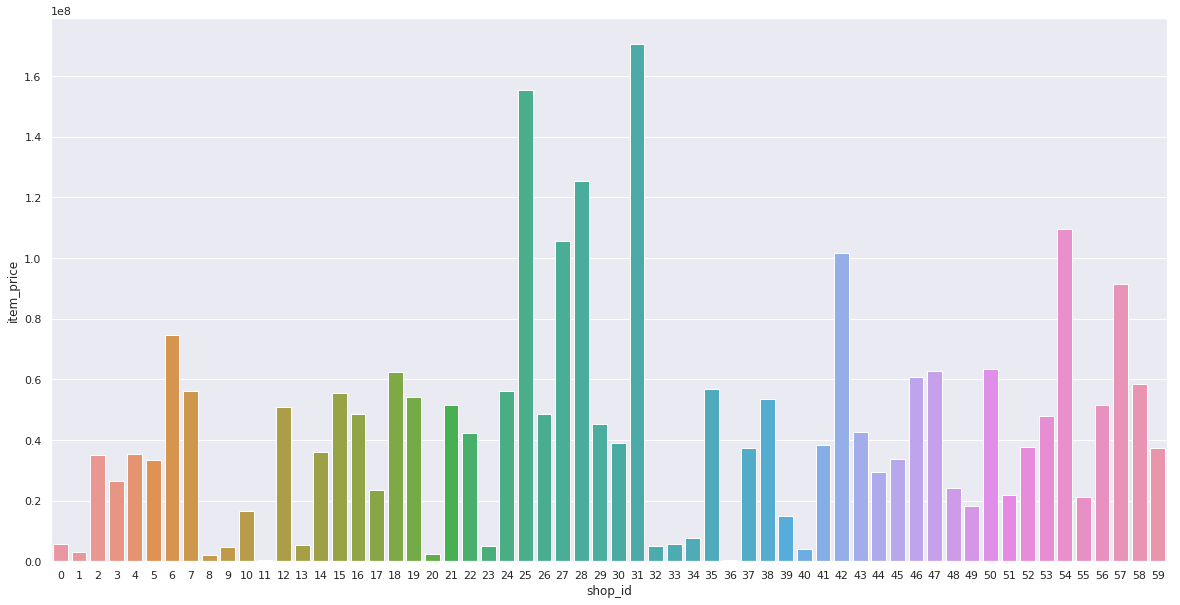

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
shop_sales_plt = sns.barplot(x= 'shop_id', y = 'item_price', data = By_shop)

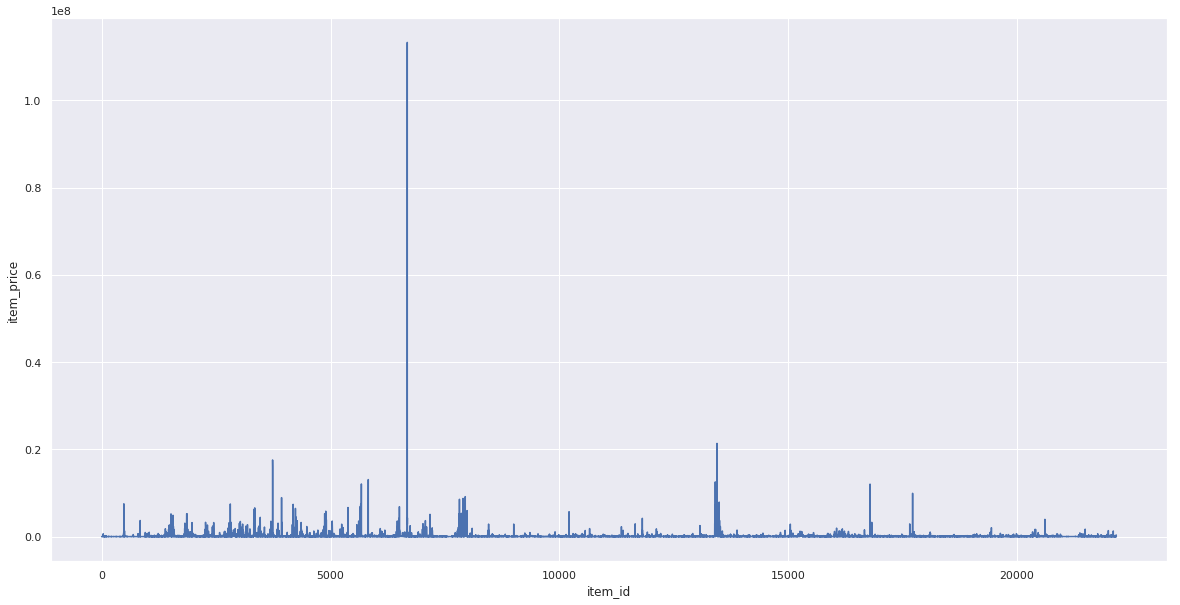

In [8]:
By_item = Training_data.groupby(['item_id'],as_index = False)['item_price'].sum()
item_plt = sns.lineplot(x= 'item_id', y = 'item_price', data = By_item)

In [9]:
By_item.item_price.idxmax()

6543

In [10]:
Training_data.query('item_id == "6543"')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1139652,29.12.2013,11,25,6543,899.0,1.0
1139653,27.12.2013,11,25,6543,899.0,1.0
1139654,26.12.2013,11,25,6543,899.0,1.0
1153874,28.12.2013,11,27,6543,899.0,1.0
1159308,26.12.2013,11,28,6543,899.0,1.0
1159309,19.12.2013,11,28,6543,899.0,1.0
1159310,12.12.2013,11,28,6543,899.0,1.0
1162267,30.12.2013,11,7,6543,899.0,1.0
1165097,25.12.2013,11,6,6543,899.0,1.0
1173417,27.12.2013,11,16,6543,899.0,1.0
